# Perceptron Algorithm

The Perceptron algorithm is a fundamental machine learning algorithm used for binary classification tasks. It is particularly effective for linearly separable data, where it aims to find a hyperplane that separates the data points into two distinct classes. In the context of 3D space, the Perceptron algorithm seeks to find a plane that separates the dots (data points) into two categories.

1. **Initialization**:
   - Start with an initial weight vector $\mathbf{w}$ and a bias term $b$. These are initialized to zero.
   - Define the learning rate $\eta$, which controls the step size during the weight update process.

2. **Input Representation**:
   - Each data point in 3D space is represented as a vector $\mathbf{x} = [x_1, x_2, x_3]$.
   - The corresponding label $y$ is either +1 or -1, indicating the class of the data point.

3. **Prediction**:
   - For a given data point $\mathbf{x}$, the Perceptron computes the weighted sum $z = \mathbf{w} \cdot \mathbf{x} + b$.
   - The predicted class is determined by the sign of $z$:
     $$
     \hat{y} = \text{sign}(z)
     $$

4. **Weight Update**:
   - If the prediction $\hat{y}$ matches the actual label $y$, no update is needed.
   - If the prediction is incorrect, update the weights and bias as follows:
     $$
     \mathbf{w} \leftarrow \mathbf{w} + \eta y \mathbf{x}
     $$
     $$
     b \leftarrow b + \eta y
     $$

5. **Iteration**:
   - Repeat the prediction and weight update steps for each data point in the training set.
   - Continue iterating over the training set until the algorithm converges, meaning all data points are correctly classified, or a maximum number of iterations is reached.

#### Finding a Plane in 3D Space

In 3D space, the Perceptron algorithm aims to find a plane defined by the equation:
$$
w_1 x_1 + w_2 x_2 + w_3 x_3 + b = 0
$$
Here, $\mathbf{w} = [w_1, w_2, w_3]$ are the weights corresponding to the three dimensions, and $b$ is the bias term. The plane separates the data points such that points on one side of the plane belong to one class, and points on the other side belong to the opposite class.


In [93]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

np.random.seed(42)


### Data Preparation

In [94]:
df = pd.read_csv('Q1data.csv')
df.head()

,x,y,z,labels
0,347.152097,-1.649685,-144.504509,1
1,119.250367,-6.984360,29.078580,1
2,3.127854,-7.509833,59.059293,1
3,-221.102032,-7.183089,629.935385,-1
4,180.430681,-18.881190,-11.225018,1


In [95]:
X = df.iloc[:, :3].values
y = df.iloc[:, 3:].values

print(X[0:5])
print(y[0:5])

[[ 347.15209687   -1.6496854  -144.50450899]
 [ 119.25036728   -6.98435955   29.0785803 ]
 [   3.12785445   -7.50983307   59.05929325]
 [-221.10203171   -7.18308882  629.9353846 ]
 [ 180.43068122  -18.8811897   -11.22501849]]
[[ 1]
 [ 1]
 [ 1]
 [-1]
 [ 1]]


### Data Visualization

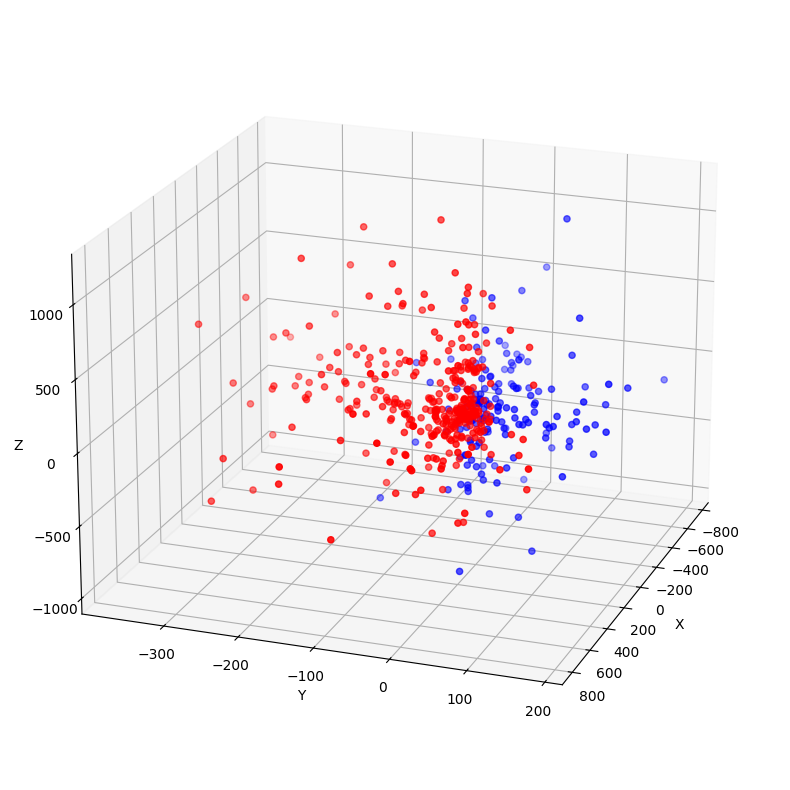

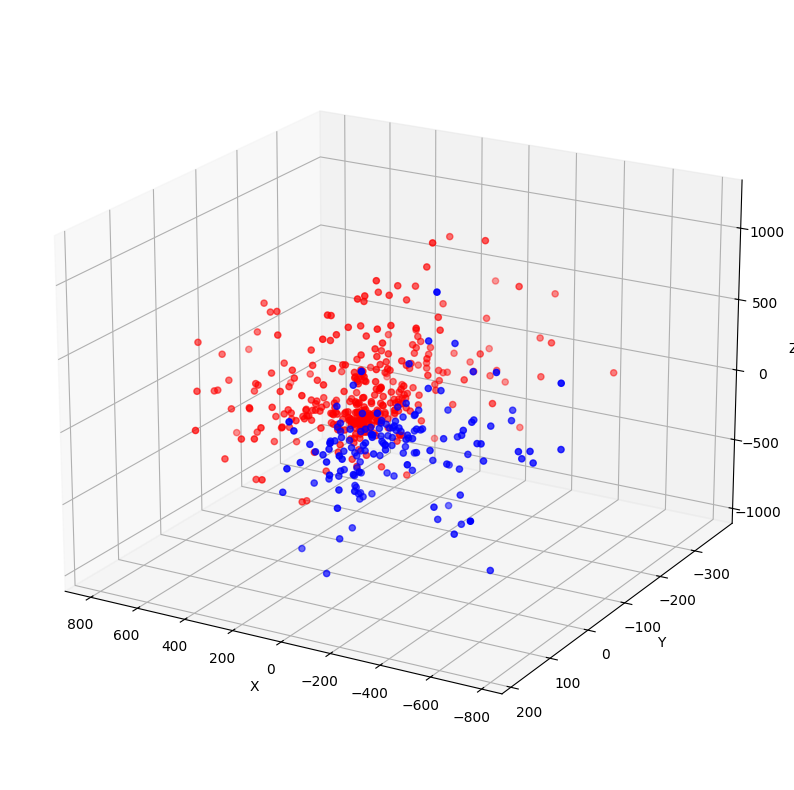

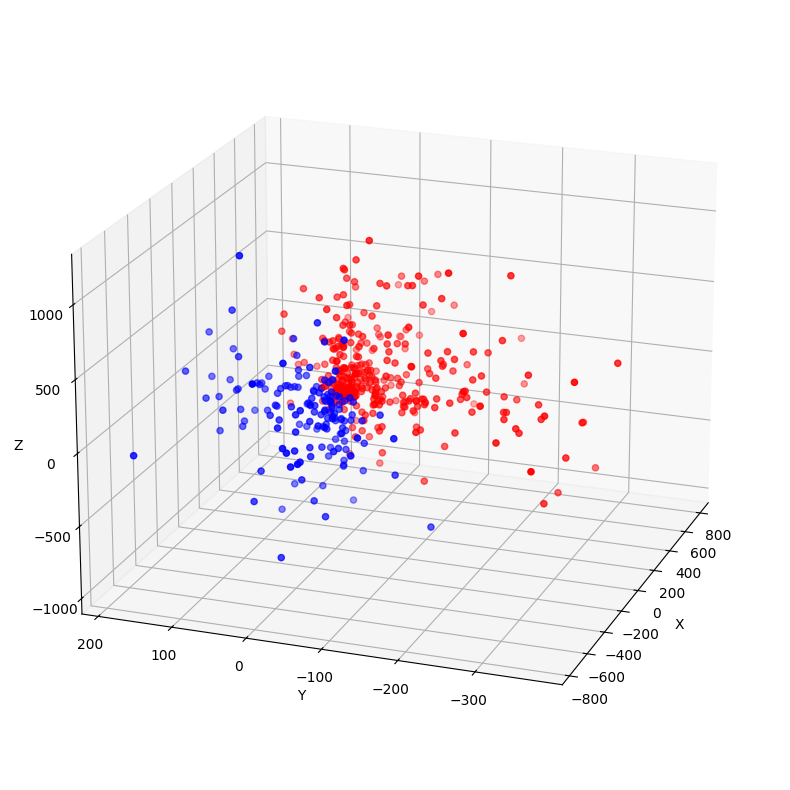

In [96]:
def plotData(view_angle):
    fig = plt.figure(figsize=(10,10))
    ax = fig.add_subplot(111, projection='3d')
    ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=y, cmap='bwr')
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_zlabel('Z')
    ax.view_init(elev=20, azim=view_angle)
    plt.show()
    
plotData(20)
plotData(120)
plotData(200)

## Main Algorithm


To build a perceptron, we need 3 attributes:

1. $η$ (eta): the learning rate is usually a small value between 0.0 and 1.0 which defines how quickly the model learns. In other words it controls how much the weights are adjusted with each update. A learning rate too big may cause the model to converge too quickly without being optimal while a small learning rate may cause the model to get stuck.
2. `n_iter`: The number of iterations (epochs) over the training dataset.
3. `w`: The weights of the perceptron, which will be initialized in the fit method.

`predict(self, X)`

This method calculates the weighted sum of the input features and the weights. It then applies the step function to determine the class label (1 or -1).

`fit(self, X, y)`

The weights are initialized to zeros, with an extra weight for the bias term. Then, the model is trained for `n_it` epochs:

- For each input vector $x_i$ and corresponding label $y_i$, 
- Predict the class label $y_{pred}$ for the input $x_i$.
- Calculate the update value using the formula: `update = eta * (yi - y_pred)`.
- Ensure $y_{pred}$, $y_i$ and `update` are scalar.
-  Update the weights (excluding the bias) using: `self.w[1:] += update * xi`.
- Update the bias term using: `self.w[0] += update`.
- Count the number of misclassifications (errors).

Given that X is a 500x3 matrix of points in 3D space and y contains the labels (1 and -1) for each point, the perceptron will learn a plane that separates the points based on their labels. The weights `self.w` will define this plane.


In [97]:
class Perceptron:
    def __init__(self, eta, n_it):
        self.eta = eta
        self.n_it = n_it
        self.w = None
    
    def predict(self, X):
        weighted_sum = np.dot(X, self.w[1:]) + self.w[0]
        return np.where(weighted_sum >= 0.0, 1, -1)

    def fit(self, X, y):

        # initializing the weights to 0
        self.w = np.zeros(1 + X.shape[1])
        self.errors = []

        #print("Weights:", self.w)

        # training the model n_iter times
        for _ in range(self.n_it):
            error = 0

            for xi, yi in zip(X, y):
                yi = yi.item() if isinstance(yi, np.ndarray) else yi
                # Calculate ŷ 
                y_pred = self.predict(xi)
                y_pred = y_pred.item() if isinstance(y_pred, np.ndarray) else y_pred

                # Calculate Update -> update = η * (y - ŷ)
                update = self.eta * (yi - y_pred)
                update = update.item() if isinstance(update, np.ndarray) else update

                # Calculate weight change -> ΔWi = η * (y - ŷ)
                delta_w = update * xi

                # 3. Update the weights -> Wi = Wi + Δ(Wi)
                self.w[1:] += delta_w
                #print("Updated Weights:", self.w[1:])

                # Update the bias (X0 = 1)
                self.w[0] += update

                # if update != 0, it means that ŷ != y
                error += int(update != 0.0)
            self.errors.append(error)

        return self

    def accuracy(self, X, y):
        # Predict the labels for the input data
        y_pred = self.predict(X)
        # Calculate the number of correct predictions
        yy = y.reshape(-1)
        correct_predictions = np.sum(y_pred == yy)
        # Calculate accuracy
        accuracy = correct_predictions / len(y)
        return accuracy

In [98]:
perceptron = Perceptron(eta=0.01, n_it=15)
perceptron.fit(X, y)
print("Final Weights:", list(perceptron.w))
accuracy = perceptron.accuracy(X, y)
print("Accuracy:", accuracy)

Final Weights: [-0.8600000000000004, 42.39607782828142, -79.3410116910206, 12.362115986478047]
Accuracy: 1.0


### Result Plane Visualisation

We calculate the $z$ values for the decision plane in a 3D space, given the $x$ and $y$ coordinates. The decision plane is defined by the weights learned by the perceptron model. The equation of a plane in 3D space can be written as:

$$ w_1 \cdot x + w_2 \cdot y + w_3 \cdot z + w_0 = 0 $$

Where:
- $w_1, w_2, w_3$ are the weights corresponding to the features $x, y, z$.
- $w_0$ is the bias term.

To solve for $z$, we rearrange the equation:

$$ w_3 \cdot z = - (w_1 \cdot x + w_2 \cdot y + w_0) $$

$$ z = - \frac{w_1 \cdot x + w_2 \cdot y + w_0}{w_3} $$

In the code:
- `xx` and `yy` are meshgrid arrays representing the `x` and `y` coordinates over a grid.
- `zz` is calculated as the `z` values for the plane at each `(xx, yy)` coordinate pair.

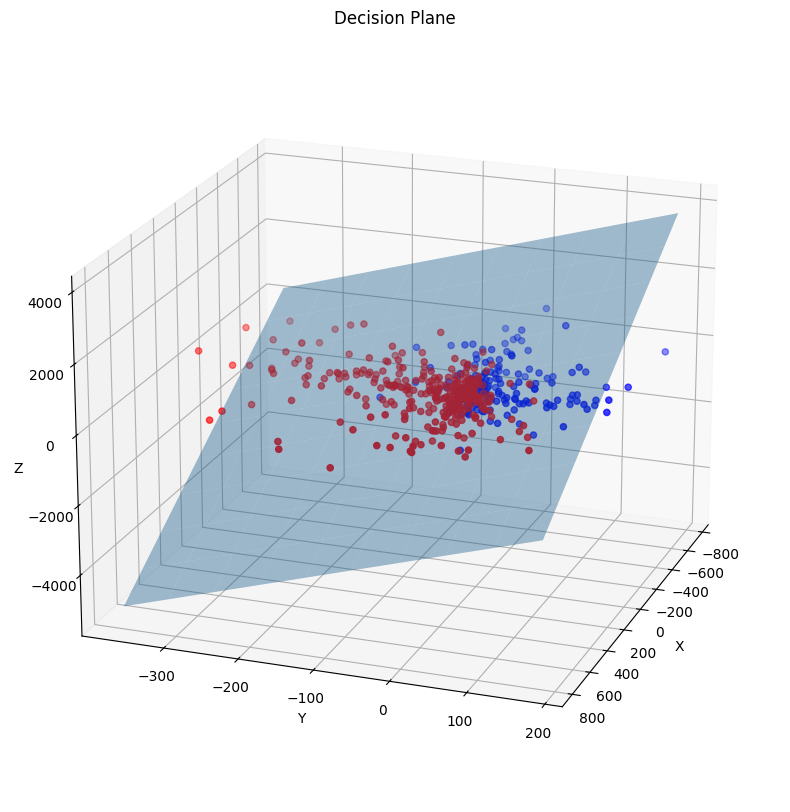

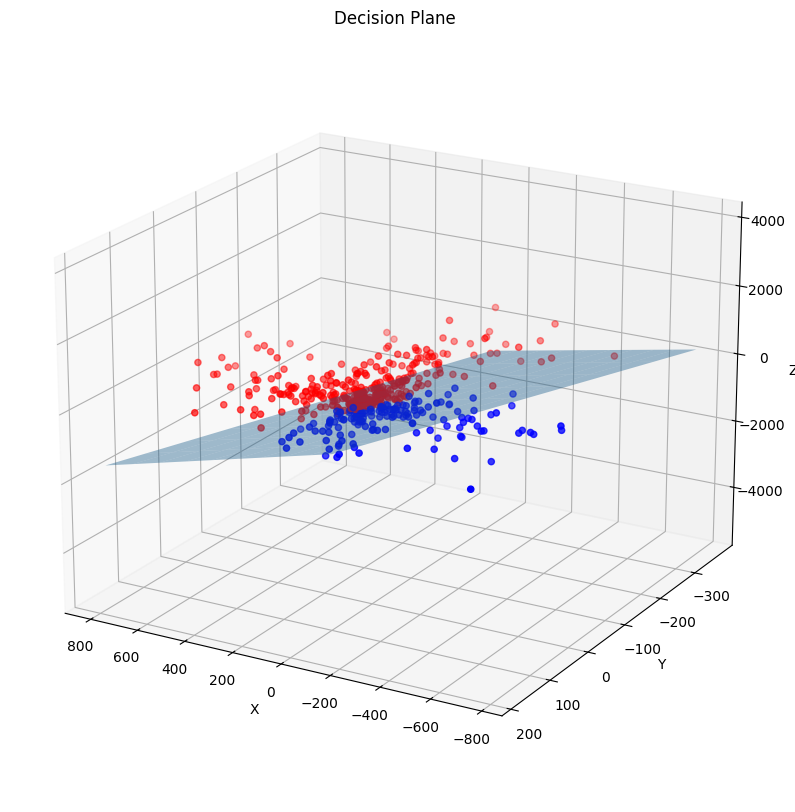

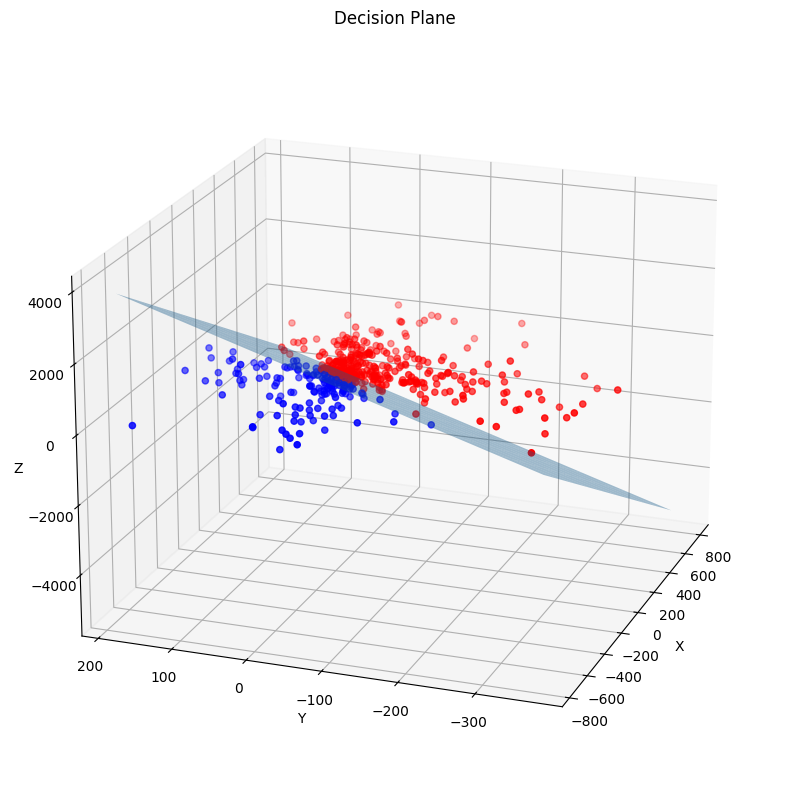

In [99]:
def plotResult(view_angle):
    # Create a 3D figure
    fig = plt.figure(figsize=(10,10))
    ax = fig.add_subplot(111, projection='3d')

    # Plot the points
    ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=y, cmap='bwr')

    # Create a meshgrid for the plane
    xx, yy = np.meshgrid(np.linspace(X[:, 0].min(), X[:, 0].max(), 10),
                        np.linspace(X[:, 1].min(), X[:, 1].max(), 10))

    # Calculate the corresponding z values for the plane
    zz = (-perceptron.w[1] * xx - perceptron.w[2] * yy - perceptron.w[0]) / perceptron.w[3]

    # Plot the decision plane
    ax.plot_surface(xx, yy, zz, alpha=0.4)

    # Add labels and title
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_zlabel('Z')
    ax.set_title('Decision Plane')
    ax.view_init(elev=20, azim=view_angle)
    # Show the plot
    plt.show()

plotResult(20)
plotResult(120)
plotResult(200)


### Learning Rate Effect

The learning rate $\eta$ is a crucial hyperparameter in the Perceptron model, as it determines the size of the steps taken during the weight update process. The choice of learning rate can significantly impact the performance and convergence of the Perceptron algorithm.



High Learning Rate: 
- A high learning rate can cause the algorithm to converge quickly, but it may also lead to overshooting the optimal solution. This can result in oscillations around the optimal weights and potentially prevent the model from converging.
- With a high learning rate, the updates to the weights are large, which can make the training process unstable. The model might not settle into a minimum and could keep fluctuating.
- While a high learning rate can speed up convergence, it might not always lead to the most accurate model. The large updates can cause the model to miss the optimal weights.

Low Learning Rate: 
- A low learning rate ensures more precise updates and can lead to a more stable convergence. However, it may also slow down the training process, requiring more iterations to reach the optimal solution.
- A low learning rate provides smaller, more controlled updates, leading to a more stable training process. However, if the learning rate is too low, the model might get stuck in local minima and take a very long time to converge.
- A low learning rate can help the model find a more accurate solution by making finer adjustments to the weights. However, this comes at the cost of increased training time.

In [112]:
eta_vals = {1e8:None, 1e4:None, 1e2:None, 0.0:None, 1e-2:None, 1e-4:None, 1e-6:None, 1e-8:None}

for e in eta_vals.keys():
    perceptron = Perceptron(eta=e, n_it=10)
    perceptron.fit(X, y)
    accuacy = perceptron.accuracy(X, y)
    weights = perceptron.w
    eta_vals[e] = [accuacy, list(weights)]

etaTable = pd.DataFrame.from_dict(eta_vals, orient='index', columns=['Accuracy', 'Weights'])
etaTable['Weights'] = etaTable['Weights'].apply(lambda x: ', '.join(map(str, x)))
print(etaTable)

              Accuracy                                            Weights
1.000000e+08     0.946  -6600000000.0, 434927433392.2945, -73278795465...
1.000000e+04     0.946  -660000.0, 43492743.339229465, -73278795.46540...
1.000000e+02     0.946  -6600.0, 434927.4333922943, -732787.9546540392...
0.000000e+00     0.694                                 0.0, 0.0, 0.0, 0.0
1.000000e-02     0.946  -0.6600000000000003, 43.49274333922944, -73.27...
1.000000e-04     0.946  -0.0065999999999999965, 0.4349274333922941, -0...
1.000000e-06     0.946  -6.6e-05, 0.00434927433392294, -0.007327879546...
1.000000e-08     0.946  -6.600000000000004e-07, 4.3492743339229454e-05...


The learning rate does not seem to affect the accuracy of the model, except when the learning rate is zero. First of all 
the number of iterations (epochs) we run the Perceptron algorithm for can influence the impact of the learning rate. If the algorithm runs for a sufficient number of iterations, even a small learning rate can eventually lead to convergence, resulting in similar accuracy. To check this fact we run the algorihtm from 1 to 10 iterations and plot the accuracies.


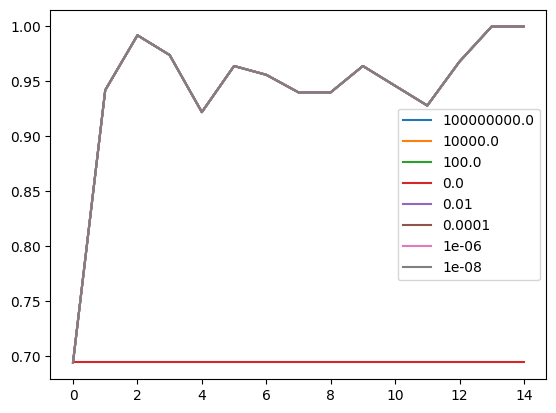

In [111]:
eta_vals = {1e8:None, 1e4:None, 1e2:None, 0.0:None, 1e-2:None, 1e-4:None, 1e-6:None, 1e-8:None}

for e in eta_vals.keys():
    acc_list = []
    for it in range(15):
        perceptron = Perceptron(eta=e, n_it=it)
        perceptron.fit(X, y)
        acc_list.append(perceptron.accuracy(X, y))
    eta_vals[e] = acc_list

for i in eta_vals.items():
    plt.plot(i[1], label=i[0])
plt.legend()
plt.show()

The accuracies does not seems to be dependent on the number of iterations or the learning rate values. This can be because of the fact that the dataset is linearly separable and relatively simple, the Perceptron algorithm might converge quickly regardless of the learning rate, as long as it is not zero. A learning rate of zero means that the weights will not be updated at all, leading to no learning. This is why we see a poor accuracy for this value.